In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Aufgabe 3)

Lösen Sie die folgende Programmieraufgabe in der Programmiersprache Python. Reichen Sie ein vollständiges Jupyter Notebook ein mit dem Dateinamen „web78_aufgabe_3.ipynb“ ab. 
Die Ausgangssituation ist der Datensatz aus https://www.kaggle.com/c/zillow-prize-1/data. Sie finden den Datensatz im Akad Online Bereich „housedata.csv“. Das Ziel ist es mit Hilfe eines Klassifikationsalgorithmus die Zielvariable „AboveMedianPrice“ mit Hilfe der anderen Merkmale vorherzusagen. 
Die Zielvariable sagt aus, dass aufgrund verschiedener Merkmale eines Hauses wie die „Qualität“ (OverallQual), „Zustand“ (OverallCond), „Größe“ (TotalBsmtSf – Total Basement Square Feet) etc. der Hauspreis entweder über oder unter dem Median liegt. 

In [2]:
df = pd.read_csv("housedata.csv")
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

- LotArea: Größe des Grundstücks
- OverallQual: Qualität
- OverallCond: Zustand
- FullBath: Anzahl Badezimmer
- TotalBsmtSF: Größe des Kellers in m²
- HalfBath: Anzahl GästeWCs
- BedroomAbvGr: Anzahl Schlafzimmer
- TotRmsAbvGrd: Anzahl Zimmer insgesamt
- Fireplaces: Anzahl Kamine
- GarageArea: Größe der Garage
- AboveMedianPrice: Binär

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [5]:
# Löschen von Null values:
df.dropna()
# Keine Null-Values vorhanden

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


## Teilaufgabe 3a) Datenanalyse- und Aufbereitung
Führen Sie selbständig eine Datenbereinigung durch, eine explorative Datenanalyse, um die wichtigen Merkmale herauszufiltern. 

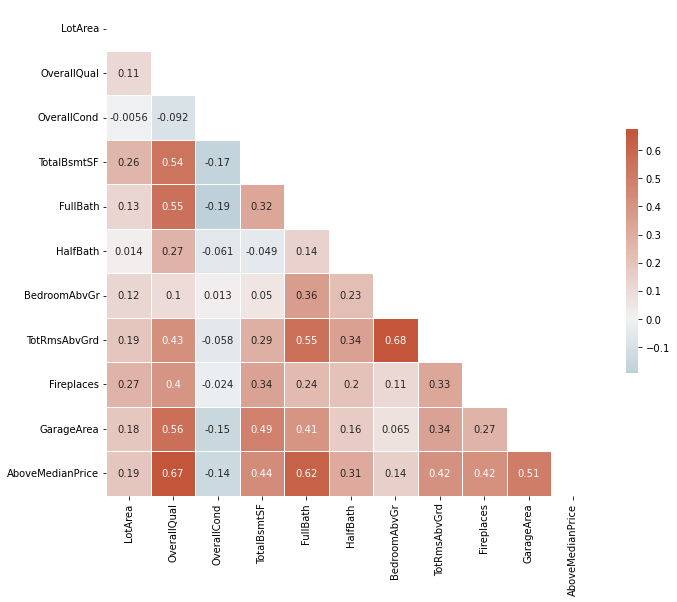

In [6]:
### Erster Überblick über die Daten, da alle als numerischer Wert vorliegen kann eine erste Korrelationsmatrix erstellt werden:
def create_corr():
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
create_corr()

Erste Insights:
- Stärkere Korreleationen bei der Bewertung ob ein Objekt über dem Durchschnittspreis liegt sind vorhanden bei:
 - Die Gesamtqualität des Objekts (OverallQual)
 - Der Anzahl der Badezimmer (FullBath)
 - Der Größe der Garagenfläche
- Eine Starke Korrelation liegt auch vor bei der Anzahl der Zimmer insgesamt zu der Anzahl der Schlafzimmer, was auch logisch nachzuvollziehen ist, denn je mehr Zimmer ein Haus hat, desto mehr Schlafzimmer sind auch dabei, Küchen, etc. sind zumeist nicht redundant vorhanden.

### Analyse LotArea

In [7]:
df["LotArea"].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

<AxesSubplot:xlabel='LotArea'>

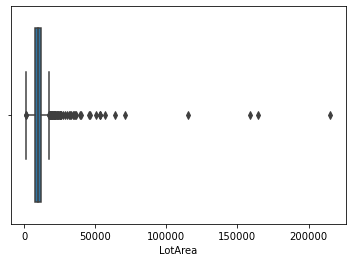

In [8]:
# die 3. Perzentile weicht sehr Stark vom Maximum ab > Der Datensatz enthält vermutlich einige wenige Ausreißer:
sns.boxplot(data=df, x="LotArea")

In [9]:
# Die Ausreißer sollten ermittelt und entfernt werden um ein besser ausbalanciertes Datenset zu haben:
df.sort_values(by=["LotArea"], ascending=False).head(15)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
313,215245,7,5,2136,2,0,3,8,2,513,1
335,164660,5,6,1499,2,0,3,7,2,529,1
249,159000,6,7,1444,2,0,4,7,2,389,1
706,115149,7,5,1643,2,0,2,5,2,739,1
451,70761,7,5,1533,2,0,2,5,2,576,1
1298,63887,10,5,6110,2,1,3,12,3,1418,0
1396,57200,5,5,747,1,0,3,7,2,572,0
769,53504,8,5,1650,3,1,4,12,1,841,1
457,53227,4,6,1364,1,0,2,6,2,529,1
384,53107,6,5,1580,2,1,3,9,2,501,1


> Man könnte den Datensatz besser ausbalancieren, indem man alle Datensätze entfernt, die eine LotArea über 40.000 haben und dann bei einer neuen Bewertung daraufhin prüfen ob das Haus "predictable" ist. Bei einer Größe von 40.000 kann man grundsätzlich sagen, dass es auch Überdurchschnittlich bewertet wird (2 von 14 Datensätzen sind hier AboveMedianPrice = 0, das ist immerhin eine Trefferquote von knapp 86%). Ein besser ausbalancziertes Datenset macht aber andere Vorhersagen "besser".

<AxesSubplot:xlabel='LotArea'>

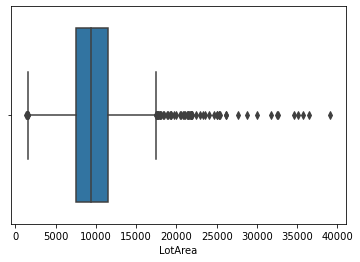

In [10]:
# Schwelle bei ca. 40.000 m² Grundstücksfläche
df = df[df["LotArea"]< 40000]
sns.boxplot(data=df, x="LotArea")

> mit der obigen Änderung/Reduzierung des Datensatzes lies sich die Korrelation von 0.19 auf 0.31 für die LotArea ändern.

### Analyse OverallQual       

In [11]:
df["OverallQual"].describe()

count    1446.000000
mean        6.090595
std         1.375800
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [12]:
df["OverallQual"].unique()
# Die Qualität ist ein Kategorischer Wert und liegt zwischen 1 und 10

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [13]:
def sum_up_cat(col_name):
    labels = list()
    zeros = list()
    ones = list()

    for col in df[col_name].unique():
        labels.append(col)
        zeros.append(len(df[(df["AboveMedianPrice"]==0)  & (df[col_name]==col)]))
        ones.append(len(df[(df["AboveMedianPrice"]==1)  & (df[col_name]==col)]))
        
    return labels, zeros, ones

def draw_stacked_bar_chart(col_name):
    label, zeros, ones = sum_up_cat(col_name)

    fig, ax = plt.subplots()
    p0 = ax.bar(label, zeros, bottom=0, label="0")
    p1 = ax.bar(label, ones, bottom=zeros, label="1")
    
    ax.bar_label(p0, label_type='center')
    ax.bar_label(p1, label_type='center')

    plt.xlabel(f"Spalte: {col_name}")
    plt.ylabel("Summen")

    plt.title(f"Gestapeltes Balkendiagramm für {col_name} und die Verteilung auf 0 und 1 bei AboveMedianPrice")
    ax.legend()

    plt.show()

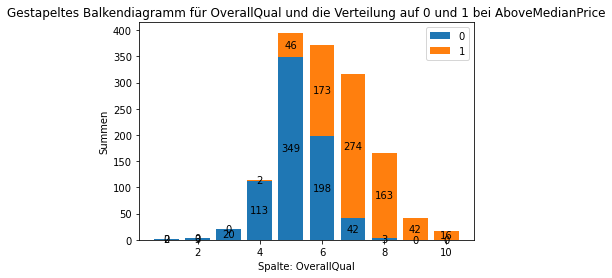

In [14]:
draw_stacked_bar_chart("OverallQual")

> Wie es scheint gibt es keine Häuser, die bei einer Qualität von 9 oder 10 nicht die Bewertung "Überdurchschnittlich" erhalten. Also, je höher die Qualität desto besser!

> Aus der Grafik geht auch stark hervor, je höher die Qualität beurteilt wird, desto wahrscheinlicher ist auch die Einstuffung in "Überdurchschnittlich"

### Analyse OverallCond    

In [15]:
df["OverallCond"].describe()

count    1446.000000
mean        5.574689
std         1.114060
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [16]:
df["OverallCond"].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

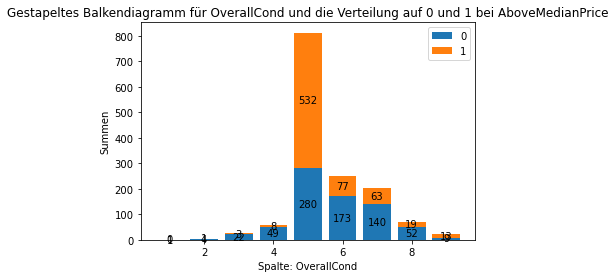

In [17]:
draw_stacked_bar_chart("OverallCond")

> Die OverallCond verhält sich wie die OverallQual, diese hat ebenfalls eine Skala, die hier aber von 1-9 geht und je höher, desto besser für die Hausbewertung, wobei wir in der Korrelationsmatrix bereits gesehen haben, dass dieses Feature von keiner großen Bedeutung ist, da es kaum einen Einfluss hat.

> Hier sieht man auch recht deutlich, dass dieser Datensatz recht unbalanciert ist, es wird fast immer mit einer 5 angegeben. Die anderen Bewertungen 1-4 und 6-9 kommen in Summe seltener vor als die 5.

> Dieses Feature würde das Modell lediglich verwirren. Die OverallQual ist hier ein besserer Indikator!

### Analyse TotalBsmtSF   

In [18]:
df["TotalBsmtSF"].describe()

count    1446.000000
mean     1048.841632
std       413.427281
min         0.000000
25%       794.250000
50%       990.000000
75%      1283.250000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

<AxesSubplot:xlabel='TotalBsmtSF'>

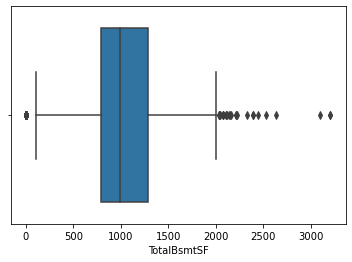

In [19]:
sns.boxplot(data=df, x="TotalBsmtSF")

> Hier sind ein paar Ausreißer erkennbar, da jedoch die Unterkellerung keinen wichtigen Einfluss auf die Ergebnisvariable hat, bleiben diese im Datenset.

### Analyse FullBath   

In [20]:
df["FullBath"].describe()

count    1446.000000
mean        1.561549
std         0.546788
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64

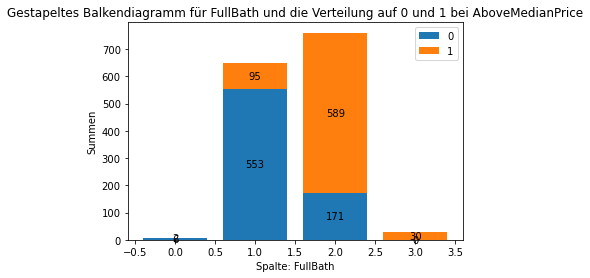

In [21]:
draw_stacked_bar_chart("FullBath")

> Die allermeisten Häuser haben ein oder zwei Bäder, selten darüber oder darunter

> Hat ein Haus mind. zwei Bäder ist die Wahrscheinlichkeit recht groß, dass es Überdurchschnittlich liegen wird.

### Analyse HalfBath  

In [22]:
df["HalfBath"].describe()

count    1446.000000
mean        0.382434
std         0.502942
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64

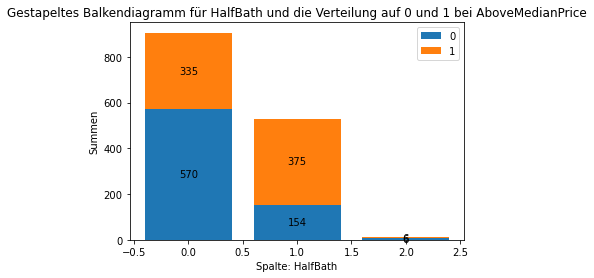

In [23]:
draw_stacked_bar_chart("HalfBath")

> Bei der Anzahl an Geste-WCs gibt es keine besonderen Insights, es hatte auch keine nennenswerten Korrelationen

### Analyse BedroomAbvGr

In [24]:
df["BedroomAbvGr"].describe()

count    1446.000000
mean        2.865837
std         0.811668
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

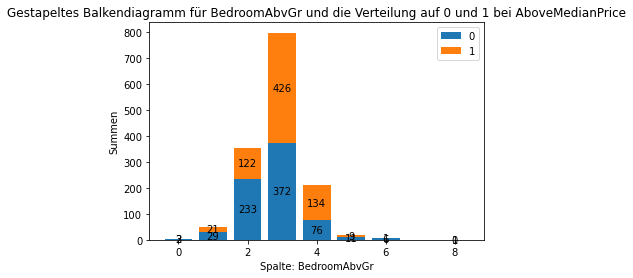

In [25]:
draw_stacked_bar_chart("BedroomAbvGr")

> Je mehr Schlafzimmer ein Haus aufweist, desto höher ist auch die Wahrscheinlichkeit einer besseren Bewertung, ab 3 Schlafzimmern steigt die Anzahl an überdurchschnittlich bewerteten Häusern im Vergleich zu den unterdurchschnittlich bewerteten.

### Analyse TotRmsAbvGrd

In [26]:
df["TotRmsAbvGrd"].describe()

count    1446.000000
mean        6.503458
std         1.609548
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

<AxesSubplot:xlabel='TotRmsAbvGrd'>

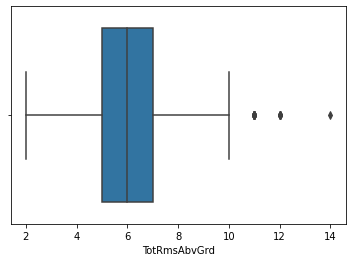

In [27]:
sns.boxplot(data=df, x="TotRmsAbvGrd")

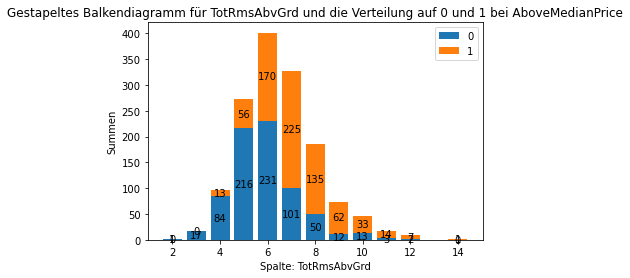

In [28]:
draw_stacked_bar_chart("TotRmsAbvGrd")

> Bei der Anzahl der Räume allgemein gibt es keine wesentlichen Auffälligkeiten, außer eben die bereits oben erwähnte starke Korrelation zu der Anzahl von Schlafzimmern

> Je mehr Zimmer, desto besser für die Bewertung

### Analyse Fireplaces

In [29]:
df["Fireplaces"].describe()

count    1446.000000
mean        0.602351
std         0.635921
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

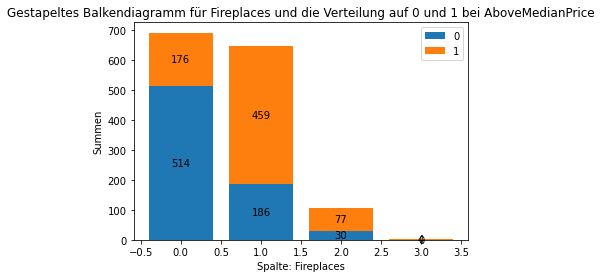

In [30]:
draw_stacked_bar_chart("Fireplaces")

> Ein Haus ohne Kamin wird zumeist schlecht bewertet. Dieser scheint bei der Bewertung wichtig zu sein, denn bereits bei einem Kamin ist werden 3/4 der Häuser als "Überdurchschnittlich" bewertet.

### Analyse GarageArea

In [31]:
df["GarageArea"].describe()

count    1446.000000
mean      471.020055
std       212.316246
min         0.000000
25%       326.250000
50%       478.000000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64

<AxesSubplot:xlabel='GarageArea'>

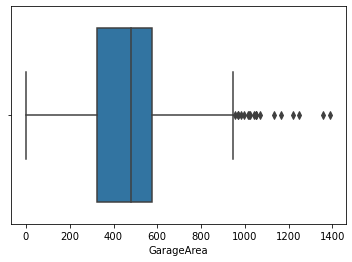

In [32]:
sns.boxplot(data=df, x="GarageArea")

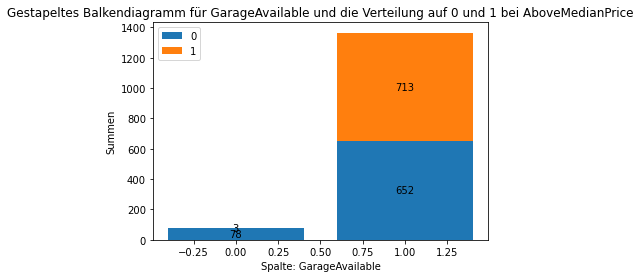

In [33]:
df["GarageAvailable"] = df["GarageArea"]>0
draw_stacked_bar_chart("GarageAvailable")

> Ist gar keine Garage vorhanden, wurde auch kein Haus als "Überdurchschnittlich" bewertet. Dies scheint ein wichtiges Attribut zu sein.

> Zudemt zeigt die Garagengröße bereits in der Korrelationsmatrix, dass sie wichtig ist.

### Abschließende Wahl der relevanten Features:

## Zusammenfassung relevanter und nicht relevanter Features:
### relevante Features:
> - LotArea: Das Grundstück kann unter Umständen einen Einfluss auf den Wert des Hauses haben, je größer desto eher wird das Haus gut bewertet (vgl. zu Beginn wurden X (Ausreißer-)Datensätze entfernt, die zu über 90% als über dem Marktpreis liegen.
> - OverallQual: Die Qualität ist ein wichtiger Faktor in der Bewertung ob ein Haus Über- oder Unterdurchschnittlich verkauft/gekauft werden kann
> - TotalBsmtSF: Ein Keller ist sicherlich auch für viele ein bedeutsames Merkmal beim Hauskauf und kann über den Preis entscheiden.
> - FullBath: Die Anzahl der Bäder ist wichtig, aus den Grafiken geht hervor, dass bei einer Anzahl von 2 Gäste-WCs das Haus bereits häufiger als Überdurchschnittlich bewertet wurde 
> - HalfBath: Erkenntbar wichtig, je mehr Gäste-WCs vorhanden sind, desto höher die Wahrscheinlichkeit für eine überdurchschnittliche Bewertung
> - TotRmsAbvGrd: Je mehr Zimmer im Haus, desto besser für die Bewertung
> - Fireplaces: Selbiges gilt auch für Kamine
> - GarageArea: Keine Garage = keine gute Bewertung, dies ist ebenfalls ein entscheidendes Feature

### nicht relevante Features:
> - BedroomAbvGr -> Ist abhängig von TotRmsAbvGrd. Abhängige Merkmale können das Modell verwirren und die Genauigkeit des Modells verschlechtern.
> - OverallCond: Dieses Attribut wird auch durch das Attribut OverallQual wiedergespiegelt.

## Teilaufgabe 3b) Modellbildung und Evaluation
Nutzen Sie dann drei verschiedene Klassifizierer ihrer Wahl und vergleichen Sie deren Performance, indem Sie die Daten in Trainings- und Testdaten aufteilen und für die Evaluation der Testdaten jeweils eine Wahrheitstabelle (Confusion Matrix) erstellen. Kommentieren Sie ihren Code und versuchen Sie zu begründen, warum die Performance je Klassifizierer unterschiedlich ausfällt / ausfallen kann. 


### Vorbereitungen
- zunächst Aufteilung der Daten in ein Trainingsset und ein Testset
- Anschließend Erstellung von hilfreichen Funktionen zur Ermittlung von Accuracy, Recall, Precision und F1Score

In [34]:
from sklearn.model_selection import train_test_split

# Relevante Features und Target extrahieren bzw. voneinander trennen.
X = df[['OverallQual', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'LotArea']]
y = df['AboveMedianPrice']

# Datenset in Trainings- und Testdaten aufteilen 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [35]:
from sklearn.metrics import confusion_matrix

def get_cm_values(cm):
    true_positive = cm[0][0]
    false_positive = cm[0][1]
    false_negative = cm[1][0]
    true_negative = cm[1][1]
    
    return true_positive, false_positive, false_negative, true_negative

def print_accuracy(cm, do_print=True):
    true_positive, false_positive, false_negative, true_negative = get_cm_values(cm)
    accuracy = float(true_positive + true_negative)/len(y_test)
    if do_print: 
        print(f'Accuracy: {round(accuracy, 4)}')
    return accuracy

> Die Accuracy gilt als allgemeine Metrik zur Messung der Genauigkeit eines Modell. Die Berechnung wird die Anzahl der korrekt klassifizierten Beispiele durch die gesamthafte Anzahl aller Beispiele dividiert. 

In [36]:
def print_recall(cm, do_print=True):
    true_positive, false_positive, false_negative, true_negative = get_cm_values(cm)
    recall = true_positive / (true_positive + false_negative)
    if do_print: 
        print(f'Recall: {round(recall, 4)}')
    return recall

> Der Recall dagegen gibt an wie viele der positiven Beispiele auch korrakt als positiv klassifiziert wurden, im Vergleich zu der Summe aller eigentlich positiven Beispielen (Also Überdurchschnittliche Hausbwertung). Ein zu hoher Recall kann dazu führen, dass das Modell viele falsch positive Ergebnisse liefert dagegen kann ein zu niedriger Recall dazu führen, dass wichtige tatsächliche positive Beispiele übersehen werden.

In [37]:
def print_precision(cm, do_print=True):
    true_positive, false_positive, false_negative, true_negative = get_cm_values(cm)
    precision = true_positive / (true_positive + false_positive)
    if do_print: 
        print(f'Precision: {round(precision, 4)}')
    return precision

> Die Precision gibt an, wie viele der klassifizierten positiven Beispiele auch tatsächlich vom Modell als positiv erkannt wurden. Hier steht die Anzahl an korrekt positiv vorhergesagten Ergebnissen der Summe von allen als positiv vorhergesehenen Werten gegenüber.

In [38]:
def print_f1_score(cm, do_print=True):
    precision = print_precision(cm, False)
    recall = print_recall(cm, False)
    f1_score = 2*((precision*recall)/(precision+recall))
    if do_print: 
        print(f'F1 Score: {round(f1_score, 4)}')

> F1-Score: Der F1-Score ist eine Metrik, die verwendet wird, um die Genauigkeit des Modells im Hinblick auf positive Klassen zu messen. Bei der Diagnose von Krebs zum Beispiel ist es besonders wichtig, hier eine hohe Genauigkeit bei den positiv vorhergesagten Elementen zu erhalten. Jeder Krebs, der false_negativ ist naturgemäß schlecht, ein Krebspatient bleibt dann unbehandelt. In unserem Beispiel ist es zwar nicht essentiell, dass der Wert hoch ist, jedoch ist es natürlich auch schade, wenn ein Haus unter Marktpreis verkauft wird, das eigentlich überdurchschnittlich ist.

### 1. Modell Entscheidungsbaum

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Model Trainieren - Entscheidungsbaum
model_t = DecisionTreeClassifier(random_state=42)
model_t.fit(X_train, y_train)

# Predictions/Vorhersagen treffen
pred_t = model_t.predict(X_test)

# Confusion Matrix brechnen und ausgeben
cm_t = confusion_matrix(y_test, pred_t)
print("Scores - Entscheidungsbaum:")
print(cm_t)
print_accuracy(cm_t)
print_recall(cm_t)
print_precision(cm_t)
print_f1_score(cm_t)

Scores - Entscheidungsbaum:
[[120  21]
 [ 16 133]]
Accuracy: 0.8724
Recall: 0.8824
Precision: 0.8511
F1 Score: 0.8664


- Beim Entscheidungsbaum liegt die gesamte Genauigkeit (Accuracy) des Modell beis etwas über 87%.
- (Precision) Rund 85% der Häuser, die über dem Marktpreis liegen wurden auch korrekt ermittelt. 15% wurden also fälschlicherweise über dem Marktpreis angesetzt.
- (Recall) Rund 88% aller Häuser, die über dem Marktpreis liegen wurden korrekt ermittelt.
- (F1-Score) Mit rund 87% ist die Genauigkeit bei der Ermittlung der über dem Marktpreis liegenden Häuser recht genau.

### 2. Modell Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Trainieren des Modells - Random Forest
model_f = RandomForestClassifier(random_state=42)
model_f.fit(X_train, y_train)

# Predictions/Vorhersagen treffen
pred_f = model_f.predict(X_test)

# Confusion Matrix brechnen und ausgeben
cm_f = confusion_matrix(y_test, pred_f)

print("Scores - Random Forest:")
print(cm_f)
print_accuracy(cm_f)
print_recall(cm_f)
print_precision(cm_f)
print_f1_score(cm_f)

Scores - Random Forest:
[[127  14]
 [ 12 137]]
Accuracy: 0.9103
Recall: 0.9137
Precision: 0.9007
F1 Score: 0.9071


- Beim Modell Random Forest liegt die gesamte Genauigkeit (Accuracy) etwas höher bei 91%.
- (Precision) Rund 90% der Häuser, die über dem Marktpreis liegen wurden auch korrekt ermittelt. Lediglich 10% wurden hier fälschlicherweise über dem Marktpreis angesetzt.
- (Recall) Rund 91% aller Häuser, die über dem Marktpreis liegen wurden vom Modell korrekt vorhergesagt.
- (F1-Score) Mit rund 90% ist die Genauigkeit bei der Ermittlung der über dem Marktpreis liegenden Häuser recht genau.

### 3. Modell Logistische Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Trainieren des Modells - Logistische Regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
pipe.fit(X_train, y_train)

# Predictions/Vorhersagen treffen
pred_l = pipe.predict(X_test)

# Confusion Matrix brechnen und ausgeben
cm_l = confusion_matrix(y_test, pred_l)
print("Confusion matrix - Logistische Regression:")
print(cm_l)

print("Scores - Logistische Regression:")
print(f"Accuracy: {round(pipe.score(X_test, y_test), 4)}")
print_recall(cm_l)
print_precision(cm_l)
print_f1_score(cm_l)

Confusion matrix - Logistische Regression:
[[124  17]
 [ 12 137]]
Scores - Logistische Regression:
Accuracy: 0.9
Recall: 0.9118
Precision: 0.8794
F1 Score: 0.8953


- Beim Modell Random Forest liegt die gesamte Genauigkeit (Accuracy) etwas höher bei 90%.
- (Precision) Rund 88% der Häuser, die über dem Marktpreis liegen wurden auch korrekt ermittelt. 12% wurden hier fälschlicherweise über dem Marktpreis angesetzt.
- (Recall) Rund 91% aller Häuser, die über dem Marktpreis liegen wurden vom Modell korrekt vorhergesagt.
- (F1-Score) Mit rund 90% ist die Genauigkeit bei der Ermittlung der über dem Marktpreis liegenden Häuser recht genau.

### Vergleich/Begründung
Im Wesentlichen sind die Ergebnisse der drei angewandten Klassifizierungsmodelle nicht grundlegend unterschiedlich. Alle weisen eine hohe Genauigkeit von über 85% aus. Aber jedes Prozent kann wichtig sein, deswegen hier Begründungen warum die Modelle unterschiedlich performen:

#### Entscheidungsbaum vs. Random Forest
- Entscheidungsbaum nutzt jeweils nur eine einzelne Variable um am Knotenpunkt eine Entscheidung zu treffen.
- Random Forest nutzt jedoch mehrere Bäume und mehrere Variablen, um die Entscheidungen zu treffen (Bessere Erfassung von Zusammenhängen).
- Ein Entscheidungsbaum hat tendenziell eine höhere Korrelation, während beim Random Forest die unterschiedlichen Bäume für eine geringere Korrelation sorgen.
- Das Random Forest Modell verwendet eine random feature selection für seine Entscheidungsbäume, was wiederrum für eine geringere Korrelation sorgt, da Features zufällig zusammen gestellt werden.

#### Random Forest vs. Logistische Regression
Random Forest hat etwas besser abgeschnitten als die Logistische Regression. Folgende Unterschiede kennzeichnen die beiden Modell aus:
- Anders als beim Entscheidungsbaum oder beim Random Forest gibt die logistische Regression lediglich einen Wahrscheinlichkeitswert dafür an, dass das Haus über oder unter dem Marktpreis liegt, hier könnte man im Modell noch nachjustieren und so eine höhere Genauigkeit erlangen
- Random Forest verwendet keine Gewichtungen für die einzelnen Features, die logistische Regression macht das schon. Hier kann auch eine höhere Genauigkeit erzielt werden, sofern die einzelnen Features unterschiedlich schwer ins Gewicht fallen.
- Random Forest braucht, da es zahlreiche Entscheidungsbäume generiert und später wieder zusammenführt mehr Rechenleistung, dagen ist die logistische Regression "schlank"

Letzendlich ist der Random Forest genauer, da die Features relativ "grob" sind, es liegen wenige feingranulare Daten vor. Diese könnten bei geringeren Varianzen bei einem Entscheidungsbaum bereits für Störungen sorgen, wohingegen bei einer logistischen Regression daruch bessere Resultate erzielen werden könnten. Dadurch, dass die Daten hier Skalen abbilden, z.B. 1-10 und dazwischen wenig Varianz besteht, kann hier der Random Forest schlussendlich besser performen.